# Matrix Multiplication

Let's consider two matrices, A and B, where A is of size
m×n and B is of size
n×p. The resulting matrix, C, will be of size
m×p.

## Code Explanation(Optional)

We use matplotlib.patches to draw the rectangle boxes that you see around the matrices.
To learn on how to use it properly you can refer to the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)

Please read the comments for a step by step breakdown

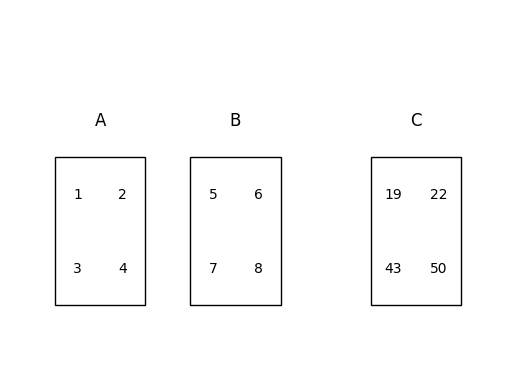

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define our two matrices A and B that we want to multiply (Can change this to change our visualization)
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix multiplication (Using np in built matrix multiplication feature)
C = np.dot(A, B)

# Visualization (.subplots creates and returns the entire figure -> fig and ax -> returns the axes of our graph)
fig, ax = plt.subplots()


# Function to draw matrix Parameters we need -> (matrix to draw, top_left_coordinates,axes-> graph, matrix_name)
def draw_matrix(matrix, top_left, ax, matrix_label):
    rows, cols = matrix.shape #get rows and cols number utilizing the .shape function
    bottom_left = (top_left[0], top_left[1] - rows)

    # Draw the cells of the matrix (places texts in the correct positions -> can change the 0.5 to increase or decrease spacing)
    for i in range(rows):
        for j in range(cols):
            cell_text = str(matrix[i, j])
            ax.text(top_left[0] + j + 0.5, top_left[1] - i - 0.5, cell_text, va='center', ha='center')

    # Draw a rectangle around the matrix (Draw the final rectangle)
    ax.add_patch(Rectangle(bottom_left, cols, rows, fill=None, edgecolor='black', lw=1))
    ax.text(top_left[0] + cols / 2, top_left[1] + 0.5, matrix_label, va='center', ha='center', fontsize=12)

# Draw matrices A, B, and C (Define the starting points of each A,B and C according to your preference)
draw_matrix(A, (0, 2), ax, 'A')
draw_matrix(B, (3, 2), ax, 'B')
draw_matrix(C, (7, 2), ax, 'C')

# Settings for display (Setting axis (else will be too small to be visible) and removing the graph)
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 4)
ax.axis('off')

#Make the plot visible
plt.show()


We can see the multiplication answer for our matrices but what were the steps? Let's visualize the solution.

Code Explanation(Optional)

In the highlight_row_col:

1. we use .patches again - Renamed to Rectangle - to draw yellow boxes.
2. We choose Alpha as 0.3 to make the text on it visible - that decides how transparent the object is going to be.
Please read the comments for a step by step breakdown

visualize_calculation:

Give it matrix A,B,C, rowNumberToCalculate, ColNumberToCalculate, figure and axis

'matrix_multiplication.mp4'

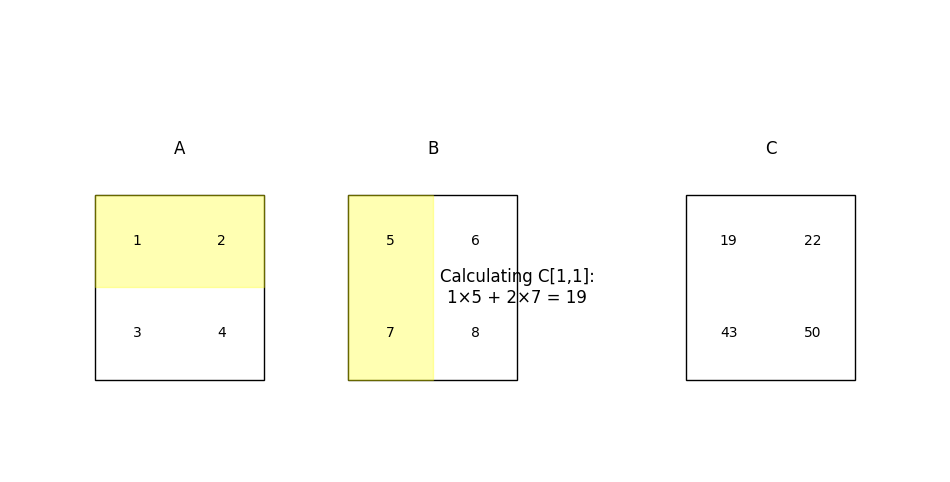

In [ ]:
import matplotlib.animation as animation

# Highlight the rows and columns to yellow (change color to change the highlighted color)
def highlight_row_col(A, B, ax, row, col, top_left_A, top_left_B):
    # Highlighting in A (row) -> p.s: the highlighted box will depend on the row chosen
    ax.add_patch(Rectangle((top_left_A[0], top_left_A[1] - row - 1), B.shape[1], 1, color='yellow', alpha=0.3))

    # Highlighting in B (column) -> p.s: the highlighted box will depend on the col chosen
    ax.add_patch(Rectangle((top_left_B[0] + col, top_left_B[1] - B.shape[0]), 1, B.shape[0], color='yellow', alpha=0.3))

# Function to visualize the calculation of one cell in C
def visualize_calculation(A, B, C, row, col, fig, ax):
    # Always clear the drawings in the previous last cell.
    ax.clear()

    # Draw matrices A, B, and C(Same coordinates as before for A, B, and C)
    top_left_A = (0, 2)
    top_left_B = (3, 2)
    top_left_C = (7, 2)
    draw_matrix(A, top_left_A, ax, 'A')
    draw_matrix(B, top_left_B, ax, 'B')
    draw_matrix(C, top_left_C, ax, 'C')

    # Highlight the row in A and column in B used for current cell calculation
    highlight_row_col(A, B, ax, row, col, top_left_A, top_left_B)

    # Calculate and display the logic behind the calculation
    # Start with an empty string for our operation
    operation = ""

    # Loop through each element in the row of A and the corresponding element in the column of B
    for i in range(A.shape[1]):
        # Multiply the elements and convert to string
        multiplication = str(A[row, i]) + '×' + str(B[i, col])
        # Add this to the operation string
        if i > 0:
            operation += ' + '  # Add a plus sign before each term except the first
        operation += multiplication

    # Get the result of the multiplication from matrix C
    result = C[row, col]

    # Format the text to be displayed
    display_text = f'Calculating C[{row+1},{col+1}]:\n{operation} = {result}'

    # Display the text on the plot
    ax.text(5, 1, display_text, va='center', ha='center', fontsize=12)

   # Settings for display (Setting axis (else will be too small to be visible) and removing the graph)

    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 4)
    ax.axis('off')

# Our animation code
def animate_calculation(i, A, B, C, fig, ax):
    # Calculate the row index for the current frame
    row = i // B.shape[1]

    # Calculate the column index for the current frame
    col = i % B.shape[1]

    # Call the function to visualize the calculation for the current cell of matrix C
    visualize_calculation(A, B, C, row, col, fig, ax)


fig, ax = plt.subplots(figsize=(12, 6))

ani = animation.FuncAnimation(fig, animate_calculation, frames=A.shape[0] * B.shape[1],
                              fargs=(A, B, C, fig, ax), interval=2000)

video_file_path = "matrix_multiplication.mp4"
ani.save(video_file_path, writer='ffmpeg')

video_file_path
